In [7]:
#package
import numpy as np
import torch as T
import matplotlib.pyplot as plt

#private
import src.pipeline as pl
import src.utils as utils
import src.plotting as plot
import src.eval_utils as eval_utils

In [8]:
OT_PATHS = [
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_3",
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_4",
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_5",
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_6",
    "/Users/gretabrianti/Work/decorrelation_methods2/ot_decorrelation/output_7"
    ]
eval_data_path = "/Users/gretabrianti/Work/decorrelation_methods2/ot_input/output_zenodo.h5"

In [9]:
output, data = pl.load_multi_cls(eval_data_path, upper_mass_cut=450)

data = data[data.label!=1]

results = data[["mass", "label", "w_score"]]

In [10]:
evaluate = eval_utils.EvalauteFramework("evaluate/", plot_bool=True, save_path='/Users/gretabrianti/Work/methods_for_decorrelation/ot-decorrelation')
label= 'DNN_label'
results = results.rename(columns={"w_score": label, "label": "labels", "mass": 'mass'})

output = {i: results[i].values for i in results.columns}
print(output)
conds = output.pop("mass")

evaluate.redefine_output(output=output,conds=conds, clf_col=label)
output

{'mass': array([ 55.856 , 101.13  , 104.163 , ...,  91.5115,  93.2057,  84.4498]), 'labels': array([0., 0., 0., ..., 0., 0., 0.]), 'DNN_label': array([0.36026818, 0.45161632, 0.38720614, ..., 0.64394706, 0.51727259,
       0.97940391])}


{'labels': array([0., 0., 0., ..., 0., 0., 0.]),
 'DNN_label': array([0.36026818, 0.45161632, 0.38720614, ..., 0.64394706, 0.51727259,
        0.97940391])}

In [17]:
evaluate.run_ot(ot_path=OT_PATHS[5], device='cpu', col_name='w_score_after_OT_5')
output

IndexError: list index out of range

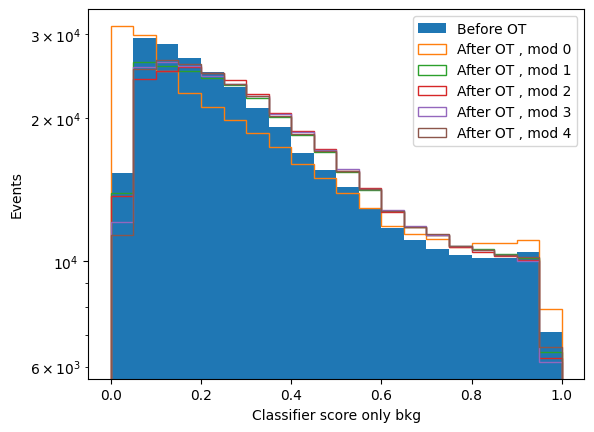

In [19]:
plt.hist(output['DNN_label'],range=(0,1),bins=20, label='Before OT')
plt.hist(output['w_score_after_OT_0'],range=(0,1),bins=20,histtype='step', label='After OT , mod 0')
plt.hist(output['w_score_after_OT_1'],range=(0,1),bins=20,histtype='step', label='After OT , mod 1')
plt.hist(output['w_score_after_OT_2'],range=(0,1),bins=20,histtype='step', label='After OT , mod 2')
plt.hist(output['w_score_after_OT_3'],range=(0,1),bins=20,histtype='step', label='After OT , mod 3')
plt.hist(output['w_score_after_OT_4'],range=(0,1),bins=20,histtype='step', label='After OT , mod 4')
# plt.scatter(data['mass'],(output['w_score_after_OT']),marker='.')
# plt.scatter(data['mass'],(output['DNN_label']),marker='.')
# plt.ylabel('Classifier output')
# plt.ylabel('Classifier output')
plt.xlabel('Classifier score only bkg')
plt.ylabel('Events')
plt.legend()
plt.yscale('log')

In [20]:
jsd_lst_disco_0, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_0', legend_kwargs={"title":'after OT'})
jsd_lst_disco_1, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_1', legend_kwargs={"title":'after OT'})
jsd_lst_disco_2, sig_eff, backgroud_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_2', legend_kwargs={"title":'after OT'})
jsd_lst_disco_3, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_3', legend_kwargs={"title":'after OT'})
jsd_lst_disco_4, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'w_score_after_OT_4', legend_kwargs={"title":'after OT'})

jsd_lst_disco_bef, sig_eff, background_rej = evaluate.bkg_rej_calculation(
                'DNN_label', legend_kwargs={"title":'before OT'})

330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000
330000


Text(0.5, 0, 'Background efficiency [%]')

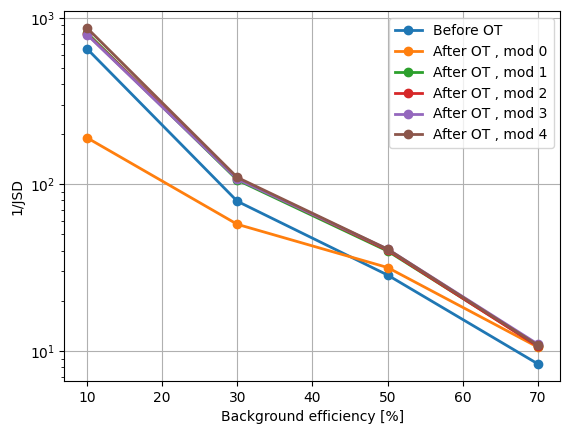

In [31]:
plt.errorbar([10,30,50,70],1./jsd_lst_disco_bef, marker = 'o',linewidth=2,label='Before OT')
plt.errorbar([10,30,50,70],1./jsd_lst_disco_0, marker = 'o',linewidth=2, label='After OT , mod 0')
plt.errorbar([10,30,50,70],1./jsd_lst_disco_1, marker = 'o' ,linewidth=2,label='After OT , mod 1')
plt.errorbar([10,30,50,70],1./jsd_lst_disco_2, marker = 'o',linewidth=2, label='After OT , mod 2')
plt.errorbar([10,30,50,70],1./jsd_lst_disco_3, marker = 'o',linewidth=2, label='After OT , mod 3')
plt.errorbar([10,30,50,70],1./jsd_lst_disco_4, marker = 'o',linewidth=2, label='After OT , mod 4')


plt.legend()
plt.yscale('log')
plt.ylabel('1/JSD')
plt.grid()

plt.xlabel('Background efficiency [%]')